In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from datetime import time

df = pd.read_csv('/content/drive/MyDrive/dataset/dataset_2019.csv', encoding='cp949')

df.head()

,Unnamed: 0,date,time,rental place number,rental place name,num,temp,precipitation_state,wind,good humidity,PM10_grade,PM2.5_grade,holiday,sen_temp,distance
0,0,2019-09-01,0,215,215. 여의도고교 앞,1,21.7,0,0.0,0,0.0,0.0,1,21.7,NaN
1,1,2019-09-01,0,217,217. NH농협은행 앞,1,21.7,0,0.0,0,0.0,0.0,1,21.7,NaN
2,2,2019-09-01,0,207,207. 여의나루역 1번출구 앞,2,21.7,0,0.0,0,0.0,0.0,1,21.7,NaN
3,3,2019-09-01,0,248,248. 초원아파트 앞,1,21.7,0,0.0,0,0.0,0.0,1,21.7,NaN
4,4,2019-09-01,0,249,249. 여의도중학교 옆,2,21.7,0,0.0,0,0.0,0.0,1,21.7,NaN


In [39]:
df_distance = pd.read_csv('/content/drive/MyDrive/4주차 프로젝트/대여소간 평균거리 데이터/대여소간 거리(m) (2).csv', encoding='cp949')

df_distance.rename(columns={'rental place num':'rental place number'}, inplace=True)

df = pd.merge(left=df,right=df_distance, how='left', on='rental place number')

df.head()

,Unnamed: 0,date,time,rental place number,rental place name,num,temp,precipitation_state,wind,good humidity,PM10_grade,PM2.5_grade,holiday,sen_temp,distance,mean_dist
0,0,2019-09-01,0,215,215. 여의도고교 앞,1,21.7,0,0.0,0,0.0,0.0,1,21.7,NaN,897.833015
1,1,2019-09-01,0,217,217. NH농협은행 앞,1,21.7,0,0.0,0,0.0,0.0,1,21.7,NaN,902.089100
2,2,2019-09-01,0,207,207. 여의나루역 1번출구 앞,2,21.7,0,0.0,0,0.0,0.0,1,21.7,NaN,904.650842
3,3,2019-09-01,0,248,248. 초원아파트 앞,1,21.7,0,0.0,0,0.0,0.0,1,21.7,NaN,991.049418
4,4,2019-09-01,0,249,249. 여의도중학교 옆,2,21.7,0,0.0,0,0.0,0.0,1,21.7,NaN,1002.632805


In [40]:
df = df.drop('distance', axis='columns')
df = df.drop('Unnamed: 0', axis='columns')
df = df.drop('num', axis='columns')
#중간저장
#df['num'] = 1

#df_save = df.groupby(['date','time']).mean()

#df_count = df.groupby(['date','time']).sum()

#df_save['num'] = df_count['num']

#df_save.to_csv('/content/df_2019.csv', encoding='cp949')

In [10]:
df = df.drop('mean_dist', axis='columns')
df = df.drop('sen_temp', axis='columns')
df['date'] = pd.to_datetime(df['date'])
df['num'] = 1
df.head()

,date,time,rental place number,rental place name,temp,precipitation_state,wind,good humidity,PM10_grade,PM2.5_grade,holiday,num
0,2019-09-01,0,215,215. 여의도고교 앞,21.7,0,0.0,0,0.0,0.0,1,1
1,2019-09-01,0,217,217. NH농협은행 앞,21.7,0,0.0,0,0.0,0.0,1,1
2,2019-09-01,0,207,207. 여의나루역 1번출구 앞,21.7,0,0.0,0,0.0,0.0,1,1
3,2019-09-01,0,248,248. 초원아파트 앞,21.7,0,0.0,0,0.0,0.0,1,1
4,2019-09-01,0,249,249. 여의도중학교 옆,21.7,0,0.0,0,0.0,0.0,1,1


In [ ]:
#year, month, day 분리
#df['year'] = 0
#df['month'] = 0
#df['day'] = 0

In [11]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df.head()


,date,time,rental place number,rental place name,temp,precipitation_state,wind,good humidity,PM10_grade,PM2.5_grade,holiday,num,year,month,day
0,2019-09-01,0,215,215. 여의도고교 앞,21.7,0,0.0,0,0.0,0.0,1,1,2019,9,1
1,2019-09-01,0,217,217. NH농협은행 앞,21.7,0,0.0,0,0.0,0.0,1,1,2019,9,1
2,2019-09-01,0,207,207. 여의나루역 1번출구 앞,21.7,0,0.0,0,0.0,0.0,1,1,2019,9,1
3,2019-09-01,0,248,248. 초원아파트 앞,21.7,0,0.0,0,0.0,0.0,1,1,2019,9,1
4,2019-09-01,0,249,249. 여의도중학교 옆,21.7,0,0.0,0,0.0,0.0,1,1,2019,9,1


In [12]:
df_207 = df[df['rental place number']==207]


In [13]:
df_207.head()

,date,time,rental place number,rental place name,temp,precipitation_state,wind,good humidity,PM10_grade,PM2.5_grade,holiday,num,year,month,day
2,2019-09-01,0,207,207. 여의나루역 1번출구 앞,21.7,0,0.0,0,0.0,0.0,1,1,2019,9,1
10,2019-09-01,0,207,207. 여의나루역 1번출구 앞,21.7,0,0.0,0,0.0,0.0,1,1,2019,9,1
11,2019-09-01,0,207,207. 여의나루역 1번출구 앞,21.7,0,0.0,0,0.0,0.0,1,1,2019,9,1
13,2019-09-01,0,207,207. 여의나루역 1번출구 앞,21.7,0,0.0,0,0.0,0.0,1,1,2019,9,1
18,2019-09-01,0,207,207. 여의나루역 1번출구 앞,21.7,0,0.0,0,0.0,0.0,1,1,2019,9,1


In [20]:
df_207.dropna()

df_2 = df_207.groupby(['date','time']).mean()

df_count = df_207.groupby(['date','time']).sum()

df_2['num'] = df_count['num']

df_2.head()


rental place number  temp  ...  month  day
date       time                             ...            
2019-09-01 0                     207  21.7  ...      9    1
           1                     207  21.2  ...      9    1
           2                     207  20.6  ...      9    1
           3                     207  20.1  ...      9    1
           4                     207  19.8  ...      9    1

[5 rows x 12 columns]

In [ ]:
#2018년 데이터셋
df_2018 = pd.read_csv('/content/drive/MyDrive/dataset/preprocessing2018f.csv',encoding='utf-8')

df_2018 = df_2018.drop(['Unnamed: 0','mean_dist','age','total count','cold_state','dayofweek','rain'], axis='columns')

df_2018['year'] = 2018

df_2 = pd.concat([df_207,df_2018])

df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17215 entries, 2 to 5474
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 17215 non-null  object 
 1   time                 17215 non-null  int64  
 2   rental place number  17215 non-null  int64  
 3   rental place name    17215 non-null  object 
 4   num                  17215 non-null  int64  
 5   temp                 17215 non-null  float64
 6   precipitation_state  17215 non-null  int64  
 7   wind                 17201 non-null  float64
 8   good humidity        17215 non-null  int64  
 9   PM10_grade           17072 non-null  float64
 10  PM2.5_grade          17072 non-null  float64
 11  holiday              17215 non-null  int64  
 12  year                 17215 non-null  int64  
 13  month                17215 non-null  int64  
 14  day                  17215 non-null  int64  
dtypes: float64(4), int64(9), object(2)
me

In [76]:
cols = ['year','month', 'day','time','temp', 'wind', 'good humidity', 'precipitation_state',  
        'PM10_grade', 'PM2.5_grade', 'holiday']

max_point = df_2.groupby(cols)['num'].sum().reset_index()
max_point.info()
max_point.isnull().sum()
max_point

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1774 non-null   int64  
 1   month                1774 non-null   int64  
 2   day                  1774 non-null   int64  
 3   time                 1774 non-null   int64  
 4   temp                 1774 non-null   float64
 5   wind                 1774 non-null   float64
 6   good humidity        1774 non-null   int64  
 7   precipitation_state  1774 non-null   int64  
 8   PM10_grade           1774 non-null   float64
 9   PM2.5_grade          1774 non-null   float64
 10  holiday              1774 non-null   int64  
 11  num                  1774 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 166.4 KB


,year,month,day,time,temp,wind,good humidity,precipitation_state,PM10_grade,PM2.5_grade,holiday,num
0,2019,9,1,0,21.7,0.0,0,0,0.0,0.0,1,13
1,2019,9,1,1,21.2,1.2,0,0,0.0,0.0,1,7
2,2019,9,1,2,20.6,1.6,0,0,0.0,0.0,1,2
3,2019,9,1,3,20.1,1.2,0,0,0.0,0.0,1,5
4,2019,9,1,4,19.8,1.5,0,0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1769,2019,11,30,17,7.3,2.3,0,0,0.0,1.0,1,7
1770,2019,11,30,18,6.6,1.7,0,0,0.0,1.0,1,5
1771,2019,11,30,19,6.1,1.8,0,0,0.0,1.0,1,6
1772,2019,11,30,21,5.7,1.2,1,0,0.0,1.0,1,2


In [77]:
max_point.columns.values

array(['year', 'month', 'day', 'time', 'temp', 'wind', 'good humidity',
       'precipitation_state', 'PM10_grade', 'PM2.5_grade', 'holiday',
       'num'], dtype=object)

In [87]:
from sklearn.model_selection import train_test_split

features = ['temp','wind','good humidity','precipitation_state','PM10_grade','PM2.5_grade','holiday']
X_train, X_test, y_train, y_test = train_test_split(max_point[features], max_point['num'], test_size=0.2, random_state=42)
X = max_point[features]
y = max_point['num']
test_df = max_point

In [88]:
X_train.dropna()
X_test.dropna()

y_train.dropna()
y_test.dropna()

999      7
596      1
1132     7
270      7
414      2
        ..
1222     1
1613     7
584     12
198      7
15      14
Name: num, Length: 355, dtype: int64

In [89]:
# 위의 표를 바탕으로 scikit-learn에 있는 모든 regression 모델 사용
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

models = [
    ('lr', lm.LinearRegression(n_jobs=-1)),
    ('ridge', lm.Ridge()),
    ('lasso', lm.Lasso()),
    ('elastic', lm.ElasticNet()),
    ('LassoLars', lm.LassoLars()),
    ('LogisticRegression', lm.LogisticRegression()),
    ('SGDRegressor', lm.SGDRegressor()),
    ('Perceptron', lm.Perceptron(n_jobs=-1)),
    ('xgboost', xgb.XGBRegressor())
]
n = 3
params = {
    'lr' : {
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'ridge': {
        'alpha': [0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'lasso': {
        'alpha': [0.1, 1.0, 10],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'elastic': {
        'alpha': [0.1, 1.0, 10],
        'normalize': [True, False],
        'fit_intercept': [True, False],
    },
    'LassoLars': {
        'alpha': [0.1, 1.0, 10],
        'normalize': [True, False],
        'fit_intercept': [True, False],
    },
    'LogisticRegression': {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False],
    },
    'SGDRegressor': {
        'penalty': ['l1', 'l2'],
        'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False],
    },
    'Perceptron' :{
        'penalty': ['None', 'l1', 'l2'],
        'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False]
    },
    'xgboost': {
        "gamma": uniform(0, 0.5).rvs(n),
        "max_depth": range(2, 7), # default 3
        "n_estimators": randint(100, 150).rvs(n), # default 100
    }
}

best_model, best_mae = None, float('inf')
for model_name, model in models:
    param_grid = params[model_name]
    grid = GridSearchCV(model, cv=5, n_jobs=-1, param_grid=param_grid)
    grid = grid.fit(X_train, y_train)
 
    model = grid.best_estimator_
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)

    print(model_name, mae)
    
    if mae < best_mae:
        best_model = model
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


lr 3.2665019393894017


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


ridge 3.2672218494629357


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


lasso 3.303599899873145


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


elastic 3.29397884168545
LassoLars 3.3035999063460366


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(s

LogisticRegression 3.867605633802817
SGDRegressor 3.2882341410400167


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Perceptron 5.374647887323944
[09:51:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost 3.213273558146517


In [90]:
# best_model은 MAE가 2.59정도로 가장 낮은 XGBRegressor
best_model

XGBRegressor(gamma=0.03865029031936329, max_depth=2, n_estimators=104)

In [92]:
from xgboost import XGBRegressor, plot_tree, plot_importance

reg_cv = XGBRegressor()
xgb_params = {'max_depth' : [4, 5, 6, 7],
              'n_estimators' : [5, 10, 20, 50, 100, 200],
              'random_state' : [42]}
grid = GridSearchCV(estimator = reg_cv, param_grid = xgb_params, scoring = 'neg_mean_absolute_error')

grid.fit(X_train, y_train)
best_param = grid.best_params_
print(best_param)

[09:52:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:52:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:52:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:52:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:52:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:52:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:52:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:52:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [97]:
from sklearn.metrics import mean_squared_error

reg = XGBRegressor(max_depth = 6, n_estimators = 20)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

# X값을 토대로 다시 정확도 확인
X_pred = reg.predict(X_test)
nmae = np.mean(abs(pred-y_test)/y_test)
nmae
#rmse = mean_squared_error(y_test,X_pred)**0.5
#rmse

[11:13:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9460000111675954

In [86]:
reg = XGBRegressor(max_depth = 6, n_estimators = 20)
reg.fit(X_train, y_train)
pred = 1.4 * reg.predict(X)
pred

[07:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([9.203708 , 9.087883 , 7.9709735, ..., 4.9066997, 4.744001 ,
       4.7222486], dtype=float32)

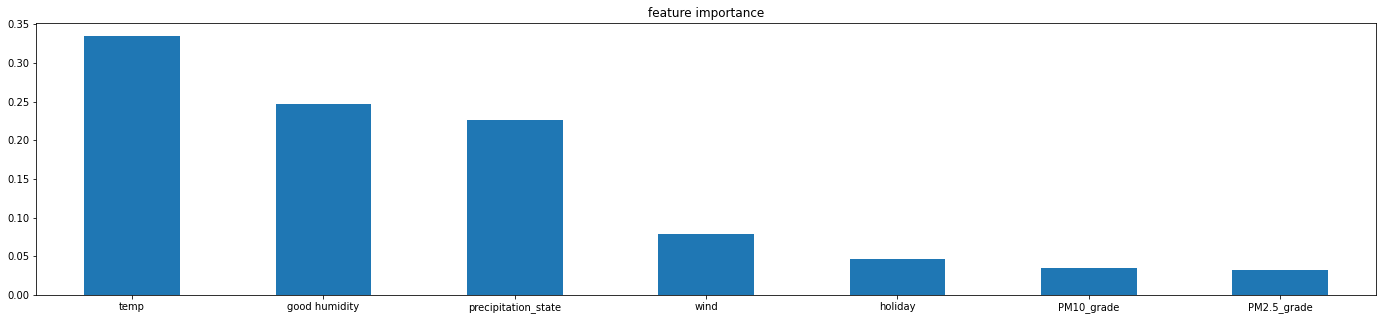

In [27]:
# 모델을 이루고 있는 피처의 중요도 확인(207번 대여소)
feature_importance = pd.Series(index=features, data=best_model.feature_importances_).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(24, 5), title="feature importance", rot=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


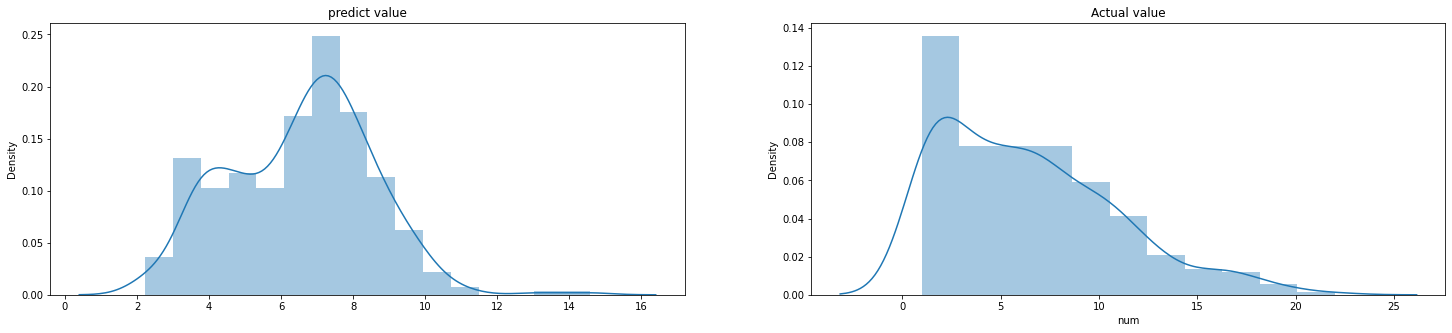

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


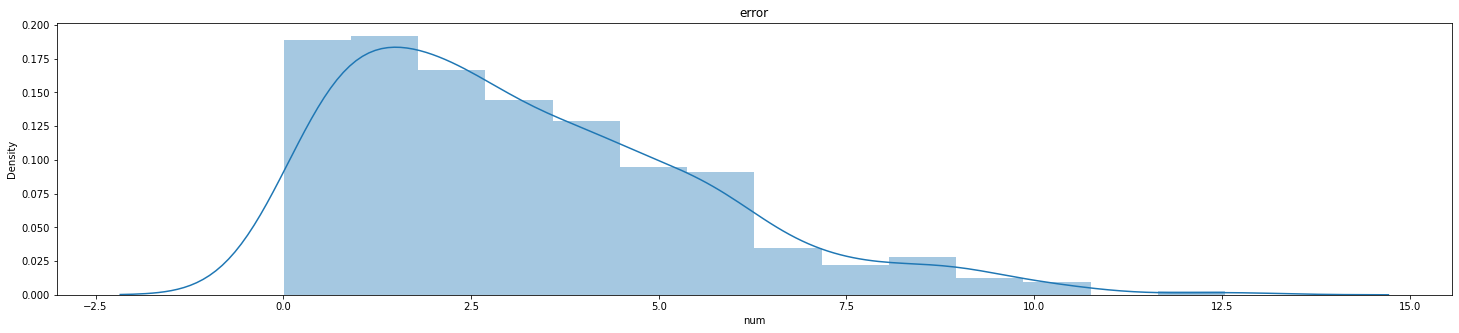

In [28]:
import seaborn as sns
# 예측값과 실제값, 오차의 분포를 확인(207번 대여소)
predictions = best_model.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(25, 5))
sns.distplot(predictions, ax=axes[0])
axes[0].set_title("predict value")
sns.distplot(y_test, ax=axes[1])
axes[1].set_title("Actual value")
plt.show()

plt.figure(figsize=(25, 5))
sns.distplot(abs(predictions - y_test))
plt.title("error")
plt.show()

In [ ]:
# Xgboost을 통해 여의도 전체 대여소에 대한 예측 모델 생성
from sklearn.metrics import accuracy_score
n = 3
results = {}
total = df['rental place name'].nunique()

for idx, (name, _df) in enumerate(df.groupby('rental place name'), 1):
    print("[%d/%d] %s" %(idx, total, name), end=' ')

    try:
        _df = _df.groupby(cols)['num'].sum().reset_index()
        

        print(_df.shape)

        X_train, X_test, y_train, y_test = train_test_split(_df[features], _df['num'], test_size=0.2, random_state=42)

        param_grid = {
            "gamma": uniform(0, 0.5).rvs(n),
            "max_depth": range(2, 7), # default 3
            "n_estimators": randint(100, 150).rvs(n), # default 100
        }

        grid = GridSearchCV(xgb.XGBRegressor(), cv=5, n_jobs=-1, param_grid=param_grid)
        grid = grid.fit(X_train, y_train)

        model = grid.best_estimator_
        predictions = model.predict(X_test)
        mae = mean_absolute_error(y_test, predictions)

        results[name] = {}
        results[name]['model'] = model
        results[name]['mae'] = mae
        results[name]['errors'] = predictions - y_test
        print('accuracy: ' + accuracy_score(y_test, pred))
    except:
        continue

[1/29] 200. 국회의원회관 (787, 12)
[07:58:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[2/29] 201. 진미파라곤 앞 (1316, 12)
[07:59:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[3/29] 202. 국민일보 앞 (1492, 12)
[07:59:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[4/29] 203. 국회의사당역 3번출구 옆 (1371, 12)
[07:59:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[5/29] 204. 국회의사당역 5번출구 옆 (1253, 12)
[07:59:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[6/29] 205. 산업은행 앞 (1133, 12)
[08:00:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[7/29] 206. KBS 앞 (1506, 12)
[08:00:26] WARN

In [ ]:
#scores = []

#model=SVC(kernel='linear')

#for thisC in [*range(1,100)]:
#model=model.fit(x_train,y_train)
#scoreTrain=model.score(x_train,y_train)
#scoreTest=model.score(x_test,y_test) 
#print("선형 SVM : C:{}, training score:{:2f}, test score:{:2f}".format
#      (thisC,scoreTrain, scoreTest))
#scores.append([scoreTrain, scoreTest])